In [1]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy.io import arff
import xgboost as xgb
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("students-all.csv")

In [9]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,major_por
0,1,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0
1,2,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,3,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0
3,4,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0
4,5,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0


In [30]:
def train_fast(df):
    
    df = df.sample(frac=1).reset_index(drop=True)
    train = df.iloc[1:round(0.7*len(df)),:]
    validation = df.iloc[round(0.7*len(df)):round(0.85*len(df)),:]
    test = df.iloc[round(0.85*len(df)):,:]
    label_train = train.romantic_yes
    label_val = validation.romantic_yes
    label_test = test.romantic_yes

    df_train = train.drop(["romantic_yes"], axis = 1)
    df_test  = test.drop(["romantic_yes"], axis = 1)
    df_val  = validation.drop(["romantic_yes"], axis = 1)
    dtrain = xgb.DMatrix(data = df_train, label=label_train)
    dval = xgb.DMatrix(data = df_val, label=label_val)
    dtest = xgb.DMatrix(data = df_test, label=label_val)
    param = {'max_depth': 12, 'eta': 1, 'objective': 'binary:logistic', 'eval_metric':'ndcg'}
    evallist = [(dval, 'eval'), (dtrain, 'train')]
    num_round = 200
    bst = xgb.train(param, dtrain, num_round, evallist)
    ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
    ret = sum(np.round(ypred) == label_test)/label_test.size
    
    return ret, bst

In [32]:
acc , bst = train_fast(df)

[0]	eval-ndcg:0.82907	train-ndcg:0.976196
[1]	eval-ndcg:0.853774	train-ndcg:0.99165
[2]	eval-ndcg:0.823092	train-ndcg:0.999148
[3]	eval-ndcg:0.883668	train-ndcg:0.999933
[4]	eval-ndcg:0.894966	train-ndcg:0.999996
[5]	eval-ndcg:0.902155	train-ndcg:1
[6]	eval-ndcg:0.899393	train-ndcg:1
[7]	eval-ndcg:0.904535	train-ndcg:1
[8]	eval-ndcg:0.907602	train-ndcg:1
[9]	eval-ndcg:0.901067	train-ndcg:1
[10]	eval-ndcg:0.902595	train-ndcg:1
[11]	eval-ndcg:0.898335	train-ndcg:1
[12]	eval-ndcg:0.902785	train-ndcg:1
[13]	eval-ndcg:0.893907	train-ndcg:1
[14]	eval-ndcg:0.88187	train-ndcg:1
[15]	eval-ndcg:0.903209	train-ndcg:1
[16]	eval-ndcg:0.894861	train-ndcg:1
[17]	eval-ndcg:0.892116	train-ndcg:1
[18]	eval-ndcg:0.902225	train-ndcg:1
[19]	eval-ndcg:0.905428	train-ndcg:1
[20]	eval-ndcg:0.908301	train-ndcg:1
[21]	eval-ndcg:0.902577	train-ndcg:1
[22]	eval-ndcg:0.887138	train-ndcg:1
[23]	eval-ndcg:0.895461	train-ndcg:1
[24]	eval-ndcg:0.903104	train-ndcg:1
[25]	eval-ndcg:0.903442	train-ndcg:1
[26]	eval-ndcg:0

In [34]:
acc

0.7070063694267515

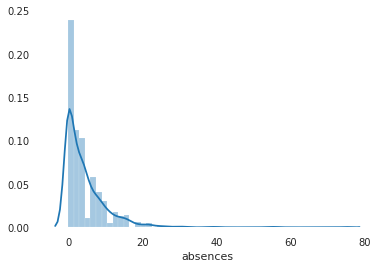

In [22]:
sns.distplot(df.absences)

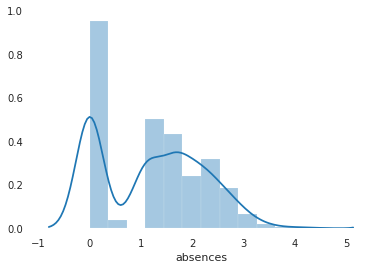

In [25]:
sns.distplot(np.log(df.absences+1)) # pytanie czy warto, może coś lepszego

In [35]:
df.absences = np.log(df.absences +1)